In [6]:
import numpy as np
import grid_world_class as gw
import riverswim_class as rs 
import riverswim_class_smdp as rs_s 

import UCRL2_L as ucrl
import UCRL_SMDP as ucrlS
import e_greedy as egreed  
import experiment_utils as utils
import importlib
importlib.reload(gw)
importlib.reload(rs)
importlib.reload(rs_s)
importlib.reload(ucrl)
importlib.reload(ucrlS)
importlib.reload(egreed)
importlib.reload(utils)
import matplotlib.pyplot as plt

GridWorld

In [7]:
# Npte we use input deltas such that the statements hold with probability delta=0.05

env_smdp = gw.grid_world(nS=16, T_max=2)
env_ucrl = gw.grid_world(nS=16, T_max=1)
ucrl_naive = ucrl.UCRL2(nS=36, nA = 4, delta = 0.05/4)
smdp_ucrl = ucrlS.UCRL_SMDP(nS = 36, nA = 4, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 4,imprv=0)
# propose new confidence sets.
smdp_ucrl_l = ucrlS.UCRL_SMDP(nS = 36, nA = 4, delta = 0.05/6, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 4,imprv=1)
# propose new Brunskill-confidence sets.
smdp_ucrl_b = ucrlS.UCRL_SMDP(nS = 36, nA = 4, delta = 0.05/6, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 4,imprv=2)

Bus_ucrl = ucrlS.BUS(nS = 36, nA = 4, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max_grid = np.array([2,4,6]),imprv=1)
Bus2_ucrl = ucrlS.BUS2(nS = 36, nA = 4, delta = 0.05, b_r=1,b_tau=1,r_max=1,tau_min=1, T_max_grid = np.array([2,4,6]),imprv=0)

# Modified bus - note that H is set as in Simchi Levi but with decision steps (or approx) (this is time steps devided by expected tau). 
H_alg = np.floor((10**7)**(1/2)/((2+1)/2)**(1/2))
Bus3_ucrl = ucrlS.BUS3(nS = 16, nA = 4, delta = 0.05, b_r=1,b_tau=1,r_max=1,tau_min=1, T_max_grid = [1.1,2,3],imprv=1,H=H_alg)



epsilon_smdp = egreed.GREEDY(nS = 36, nA = 4)


_,_,_,gstar = utils.VI(env_ucrl)




In [202]:
# Test of optimal policies.
env1 = gw.grid_world(nS=5*5, T_max=1)
env2 = gw.grid_world(nS=5*5, T_max=2)
env5 = gw.grid_world(nS=5*5, T_max=10)

vi1 = utils.VI(env1,epsilon=10**(-5))
vi2 = utils.VI(env2,epsilon=10**(-5))
vi5 = utils.VI(env5,epsilon=10**(-5))

print(vi1[3],vi2[3],vi5[3])



0.19354948896812285 0.19354733994437723 0.19354719160723177


In [34]:
reward_ucrl,tau_ucrl,_,_ = utils.run_experiment(env_ucrl, ucrl_naive, T = 10**6)
reward_sucrl,tau_sucrl ,_,_= utils.run_experiment(env_smdp, smdp_ucrl, T = 10**6)
reward_sucrl_l,tau_sucrl_l ,_,_= utils.run_experiment(env_smdp, smdp_ucrl_l, T = 10**6)
#reward_sucrl_b,tau_sucrl_b,_,_ = utils.run_experiment(env_smdp, smdp_ucrl_b, T = 10**6)


In [35]:
reward_bus,tau_bus,_,_ = utils.run_experiment(env_smdp, Bus_ucrl, T = 10**6)

reward_bus2,tau_bus2,_,_ = utils.run_experiment(env_smdp, Bus2_ucrl, T = 10**6)


In [8]:
reward_bus3,tau_bus3,_,_ = utils.run_experiment(env_smdp, Bus3_ucrl, T = 10**7)
regrets_bus3 = utils.calc_regret(reward=reward_bus3, tau = tau_bus3, optimal_gain=gstar/3)


In [37]:
regret_ucrl = utils.calc_regret(reward=reward_ucrl, tau = tau_ucrl, optimal_gain=gstar)
regret_sucrl = utils.calc_regret(reward=reward_sucrl, tau = tau_sucrl, optimal_gain=gstar)
regret_sucrl_l = utils.calc_regret(reward=reward_sucrl_l, tau = tau_sucrl_l, optimal_gain=gstar)
#regret_sucrl_b = utils.calc_regret(reward=reward_sucrl_b, tau = tau_sucrl_b, optimal_gain=gstar)


In [38]:
regrets_bus = utils.calc_regret(reward=reward_bus, tau = tau_bus, optimal_gain=gstar)
regrets_bus2 = utils.calc_regret(reward=reward_bus2, tau = tau_bus2, optimal_gain=gstar)


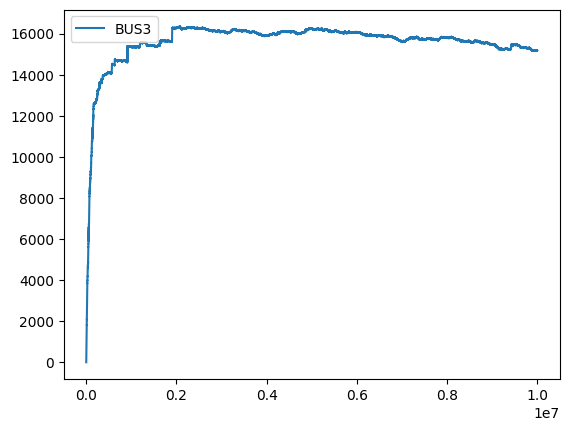

In [9]:
#plt.plot(regret_sucrl, label = "Regret surcl T_max = 4")
#plt.plot(regret_sucrl_l, label = "Regret surcl_l T_max = 4")
#plt.plot(regret_sucrl_b, label = "Regret surcl_b T_max = 4")



#plt.plot(regret_ucrl, label = "UCRL")
#plt.plot(regrets_bus, label = "BUS")
plt.plot(regrets_bus3, label = "BUS3")

#plt.plot(regrets_bus2, label = "BUS2")


plt.legend()

In [10]:
print("Probs, BUS3", Bus3_ucrl.current_sample_prop)


Probs, BUS3 [0.88135968 0.0634784  0.05516192]


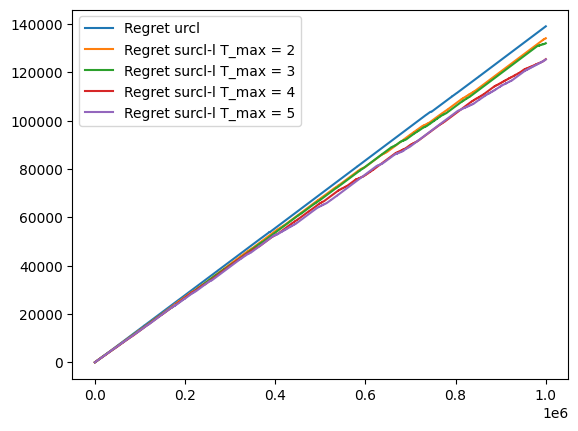

In [101]:
# Sanity check

env_ucrl = gw.grid_world(nS=49, T_max=1)
ucrl_naive = ucrl.UCRL2(nS=49, nA = 4, delta = 0.05/4)


env_smdp2 = gw.grid_world(nS=49, T_max=2)
smdp_ucrl2 = ucrlS.UCRL_SMDP(nS = 49, nA = 4, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 2,imprv=0)

env_smdp3 = gw.grid_world(nS=49, T_max=3)
smdp_ucrl3 = ucrlS.UCRL_SMDP(nS = 49, nA = 4, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 3,imprv=0)

env_smdp4 = gw.grid_world(nS=49, T_max=4)
smdp_ucrl4 = ucrlS.UCRL_SMDP(nS = 49, nA = 4, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 4,imprv=0)

env_smdp5 = gw.grid_world(nS=49, T_max=5)
smdp_ucrl5 = ucrlS.UCRL_SMDP(nS = 49, nA = 4, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 5,imprv=0)

env_smdp6 = gw.grid_world(nS=49, T_max=6)
smdp_ucrl6 = ucrlS.UCRL_SMDP(nS = 49, nA = 4, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 6,imprv=0)

_,_,_,gstar = utils.VI(env_ucrl)

reward_ucrl,tau_ucrl,_,_ = utils.run_experiment(env_ucrl, ucrl_naive, T = 10**6)
regret_ucrl = utils.calc_regret(reward=reward_ucrl, tau = tau_ucrl, optimal_gain=gstar)


reward_sucrl2,tau_sucrl2,_,_ = utils.run_experiment(env_smdp2, smdp_ucrl2, T =  10**6)
regret_sucrl2 = utils.calc_regret(reward=reward_sucrl2, tau = tau_sucrl2, optimal_gain=gstar)

reward_sucrl3,tau_sucrl3,_,_ = utils.run_experiment(env_smdp3, smdp_ucrl3, T =  10**6)
regret_sucrl3 = utils.calc_regret(reward=reward_sucrl3, tau = tau_sucrl3, optimal_gain=gstar)

reward_sucrl4,tau_sucrl4,_,_ = utils.run_experiment(env_smdp4, smdp_ucrl4, T =  10**6)
regret_sucrl4 = utils.calc_regret(reward=reward_sucrl4, tau = tau_sucrl4, optimal_gain=gstar)

reward_sucrl5,tau_sucrl5,_,_ = utils.run_experiment(env_smdp5, smdp_ucrl5, T =  10**6)
regret_sucrl5 = utils.calc_regret(reward=reward_sucrl5, tau = tau_sucrl5, optimal_gain=gstar)


plt.plot(regret_ucrl, label = "Regret urcl")
plt.plot(regret_sucrl2, label = "Regret surcl-l T_max = 2")
plt.plot(regret_sucrl3, label = "Regret surcl-l T_max = 3")
plt.plot(regret_sucrl4, label = "Regret surcl-l T_max = 4")
plt.plot(regret_sucrl5, label = "Regret surcl-l T_max = 5")


plt.legend()

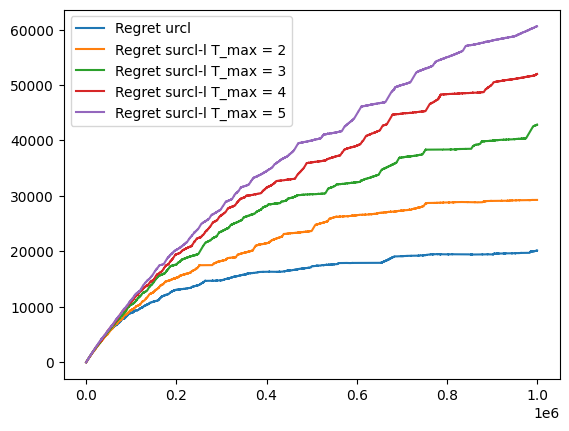

In [21]:

# Sanity check

env_ucrl = gw.grid_world(nS=49, T_max=1)
ucrl_naive = ucrl.UCRL2_L(nS=49, nA = 4, delta = 0.05)

env_smdp2 = gw.grid_world(nS=49, T_max=2)
smdp_ucrl2 = ucrlS.UCRL_SMDP(nS = 49, nA = 4, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 2,imprv=1)

env_smdp3 = gw.grid_world(nS=49, T_max=3)
smdp_ucrl3 = ucrlS.UCRL_SMDP(nS = 49, nA = 4, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 3,imprv=1)

env_smdp4 = gw.grid_world(nS=49, T_max=4)
smdp_ucrl4 = ucrlS.UCRL_SMDP(nS = 49, nA = 4, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 4,imprv=1)

env_smdp5 = gw.grid_world(nS=49, T_max=5)
smdp_ucrl5 = ucrlS.UCRL_SMDP(nS = 49, nA = 4, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 5,imprv=1)

env_smdp6 = gw.grid_world(nS=49, T_max=6)
smdp_ucrl6 = ucrlS.UCRL_SMDP(nS = 49, nA = 4, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 6,imprv=1)

_,_,_,gstar = utils.VI(env_ucrl)

reward_ucrl,tau_ucrl,_,_ = utils.run_experiment(env_smdp4, ucrl_naive, T = 10**6)
regret_ucrl = utils.calc_regret(reward=reward_ucrl, tau = tau_ucrl, optimal_gain=gstar)


reward_sucrl2,tau_sucrl2,_,_ = utils.run_experiment(env_smdp4, smdp_ucrl2, T =  10**6)
regret_sucrl2 = utils.calc_regret(reward=reward_sucrl2, tau = tau_sucrl2, optimal_gain=gstar)

reward_sucrl3,tau_sucrl3,_,_ = utils.run_experiment(env_smdp4, smdp_ucrl3, T =  10**6)
regret_sucrl3 = utils.calc_regret(reward=reward_sucrl3, tau = tau_sucrl3, optimal_gain=gstar)

reward_sucrl4,tau_sucrl4,_,_ = utils.run_experiment(env_smdp4, smdp_ucrl4, T =  10**6)
regret_sucrl4 = utils.calc_regret(reward=reward_sucrl4, tau = tau_sucrl4, optimal_gain=gstar)

reward_sucrl5,tau_sucrl5,_,_ = utils.run_experiment(env_smdp4, smdp_ucrl5, T =  10**6)
regret_sucrl5 = utils.calc_regret(reward=reward_sucrl5, tau = tau_sucrl5, optimal_gain=gstar)

#plot
plt.plot(regret_ucrl, label = "Regret urcl")
plt.plot(regret_sucrl2, label = "Regret surcl-l T_max = 2")
plt.plot(regret_sucrl3, label = "Regret surcl-l T_max = 3")
plt.plot(regret_sucrl4, label = "Regret surcl-l T_max = 4")
plt.plot(regret_sucrl5, label = "Regret surcl-l T_max = 5")


plt.legend()


0.008333333333333333

RiverSwim

In [246]:
env_smdp = rs.riverswim(nS=50, T_max=16)
env_ucrl = rs.riverswim(nS=50, T_max=1)
ucrl_naive = ucrl.UCRL2_L(nS=10, nA = 2, delta = 0.05)
smdp_ucrl = ucrlS.UCRL_SMDP(nS = 10, nA = 2, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 4,imprv=0)
# propose new confidence sets.
smdp_ucrl_l = ucrlS.UCRL_SMDP(nS = 10, nA = 2, delta = 0.05/6, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 4,imprv=1)
# propose new Brunskill-confidence sets.
smdp_ucrl_b = ucrlS.UCRL_SMDP(nS = 10, nA = 2, delta = 0.05/6, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 4,imprv=2)

Bus_ucrl = ucrlS.BUS(nS = 10, nA = 2, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max_grid = np.array([2,8,16,20]),imprv=0)
Bus2_ucrl = ucrlS.BUS2(nS = 10, nA = 2, delta = 0.05, b_r=1,b_tau=1,r_max=1,tau_min=1, T_max_grid = np.array([2,8,16,20]),imprv=0)

# Modified bus - note that H is set as in Simchi Levi but with decision steps (or approx) (this is time steps devided by expected tau). 
H_alg = 50000 #np.floor(3*50**(2/3)*2**(1/2)*10**(7/2)/((50+1)/2)**(1/2))
T_grid = np.array([np.ceil(50**(d/10)) for d in range(0,10+1)])
print(H_alg,T_grid)
Bus3_ucrl = ucrlS.BUS3(nS = 50, nA = 2, delta = 0.05, b_r=1,b_tau=1,r_max=1,tau_min=1, T_max_grid = T_grid,imprv=1,H=H_alg)


epsilon_smdp = egreed.GREEDY(nS = 10, nA = 2)
_,_,_,gstar = utils.VI(env_ucrl,epsilon=10**(-4))
print(gstar,utils.VI(env_smdp,epsilon=10**(-4))[3])


50000 [ 1.  2.  3.  4.  5.  8. 11. 16. 23. 34.]
0.4666201786309614 0.4666183469715435


In [23]:
reward_ucrl,tau_ucrl,_,_ = utils.run_experiment(env_ucrl, ucrl_naive, T = 5*10**5)
reward_sucrl,tau_sucrl,_,_ = utils.run_experiment(env_smdp, smdp_ucrl, T = 5*10**5)
reward_sucrl_l,tau_sucrl_l,_,_ = utils.run_experiment(env_smdp, smdp_ucrl_l, T = 5*10**5)
reward_sucrl_b,tau_sucrl_b,_,_ = utils.run_experiment(env_smdp, smdp_ucrl_b, T = 5*10**5)


In [24]:
reward_ucrl,tau_ucrl,_,_ = utils.run_experiment(env_ucrl, ucrl_naive, T = 5*10**5)


In [25]:
reward_bus,tau_bus,_,_ = utils.run_experiment(env_smdp, Bus_ucrl, T = 5*10**5)
reward_bus2,tau_bus2,_,_ = utils.run_experiment(env_smdp, Bus2_ucrl, T = 5*10**5)


In [26]:
reward_eps,tau_eps,_,_ = utils.run_experiment(env_smdp, epsilon_smdp, T = 5*10**5)
regrets_eps = utils.calc_regret(reward=reward_eps, tau = tau_eps, optimal_gain=gstar)


In [27]:
regret_ucrl = utils.calc_regret(reward=reward_ucrl, tau = tau_ucrl, optimal_gain=gstar)
regret_sucrl = utils.calc_regret(reward=reward_sucrl, tau = tau_sucrl, optimal_gain=gstar)
regret_sucrl_l = utils.calc_regret(reward=reward_sucrl_l, tau = tau_sucrl_l, optimal_gain=gstar)
regret_sucrl_b = utils.calc_regret(reward=reward_sucrl_b, tau = tau_sucrl_b, optimal_gain=gstar)

regrets_bus = utils.calc_regret(reward=reward_bus, tau = tau_bus, optimal_gain=gstar)
regrets_bus2 = utils.calc_regret(reward=reward_bus2, tau = tau_bus2, optimal_gain=gstar)
regrets_eps = utils.calc_regret(reward=reward_eps, tau = tau_eps, optimal_gain=gstar)


In [247]:
reward_bus3,tau_bus3,_,_ = utils.run_experiment(env_smdp, Bus3_ucrl, T = 10**7)
regrets_bus3 = utils.calc_regret(reward=reward_bus3, tau = tau_bus3, optimal_gain=gstar)

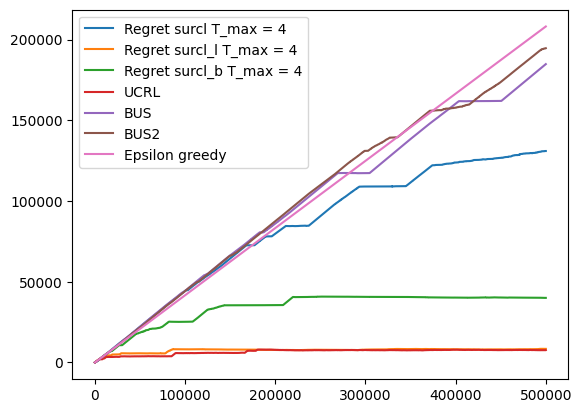

In [28]:
plt.plot(regret_sucrl, label = "Regret surcl T_max = 4")
plt.plot(regret_sucrl_l, label = "Regret surcl_l T_max = 4")
plt.plot(regret_sucrl_b, label = "Regret surcl_b T_max = 4")



plt.plot(regret_ucrl, label = "UCRL")
plt.plot(regrets_bus, label = "BUS")

plt.plot(regrets_bus2, label = "BUS2")
plt.plot(regrets_eps, label = "Epsilon greedy")

plt.legend()

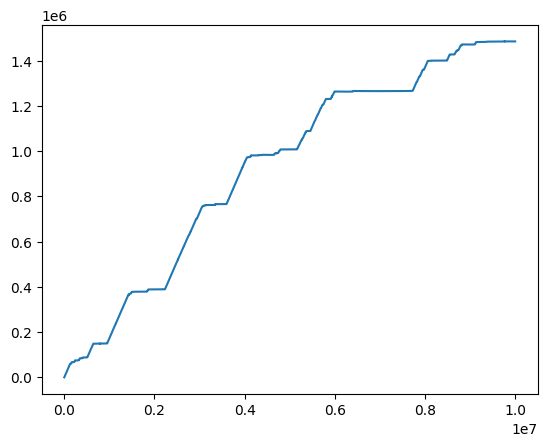

In [248]:
plt.plot(regrets_bus3, label = "Epsilon greedy")


In [249]:
print("Probs, BUS3", Bus3_ucrl.current_sample_prop,'T_grid',T_grid)
print(Bus3_ucrl.reward_zero_one)
print(Bus3_ucrl.reward_grid)
print(Bus3_ucrl.partition,H_alg*Bus3_ucrl.partition)

Probs, BUS3 [0.09944288 0.1008146  0.097701   0.09978741 0.10006145 0.10000988
 0.1008146  0.10063359 0.10013209 0.1006025 ] T_grid [ 1.  2.  3.  4.  5.  8. 11. 16. 23. 34.]
[0.05886832 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
[55.04057718 52.09443532 57.88263464 54.3745472  53.81291793 53.92090903
 52.09443532 52.53377925 53.66314262 52.60744931]
23 1150000
